In [7]:
pip install tensorflow

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.3 MB 3.3 MB/s eta 0:01:59
   ---------------------------------------- 0.3/390.3 MB 2.8 MB/s eta 0:02:18
   ---------------------------------------- 0.5/390.3 MB 3.1 MB/s eta 0:02:04
   ---------------------------------------- 0.6/390.3 MB 3.2 MB/s eta 0:02:03
   ---------------------------------------- 0.8/390.3 MB 3.5 MB/s eta 0:01:53
   ---------------------------------------- 0.9/390.3 MB 3.3 MB/s eta 0:01:59
   ---------------------------------------- 1.0/390.3 MB 3.1 MB/s eta 0:02:06
   ---------------------------------------- 1.1/390.3 MB 3.0 MB/s eta 0:02:09
   ---------------------------------------- 1.3/390.3 MB 3.0 MB/s eta 0:02:09
   ---------------------------------------- 1.4/390.3 MB 3.1 MB/s eta 0:02:04
   ---------------------------------------- 1.6/390.3 MB 3.2 MB/s eta 0:02:01
   ---------------------------------------- 1.8/390.3 MB 3.2 MB/s eta 0

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [55]:
df = pd.read_csv('Coca-Cola_stock_history.csv')

In [57]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


In [59]:
df.index

RangeIndex(start=0, stop=15311, step=1)

In [61]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15311 non-null  object 
 1   Open          15311 non-null  float64
 2   High          15311 non-null  float64
 3   Low           15311 non-null  float64
 4   Close         15311 non-null  float64
 5   Volume        15311 non-null  int64  
 6   Dividends     15311 non-null  float64
 7   Stock Splits  15311 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 957.1+ KB
None


In [63]:
print(df.describe())

               Open          High           Low         Close        Volume  \
count  15311.000000  15311.000000  15311.000000  15311.000000  1.531100e+04   
mean      11.812883     11.906708     11.717375     11.815409  9.139213e+06   
std       15.025726     15.133336     14.915580     15.026316  7.957947e+06   
min        0.037154      0.037279      0.034890      0.037028  7.680000e+04   
25%        0.238453      0.240305      0.236415      0.238312  2.889600e+06   
50%        4.935146      4.980985      4.884242      4.937339  7.708800e+06   
75%       17.383926     17.612844     17.168283     17.415106  1.307130e+07   
max       66.037933     66.235058     64.776308     65.259270  1.241690e+08   

          Dividends  Stock Splits  
count  15311.000000  15311.000000  
mean       0.001678      0.001110  
std        0.021302      0.049148  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  


In [65]:
print(df.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


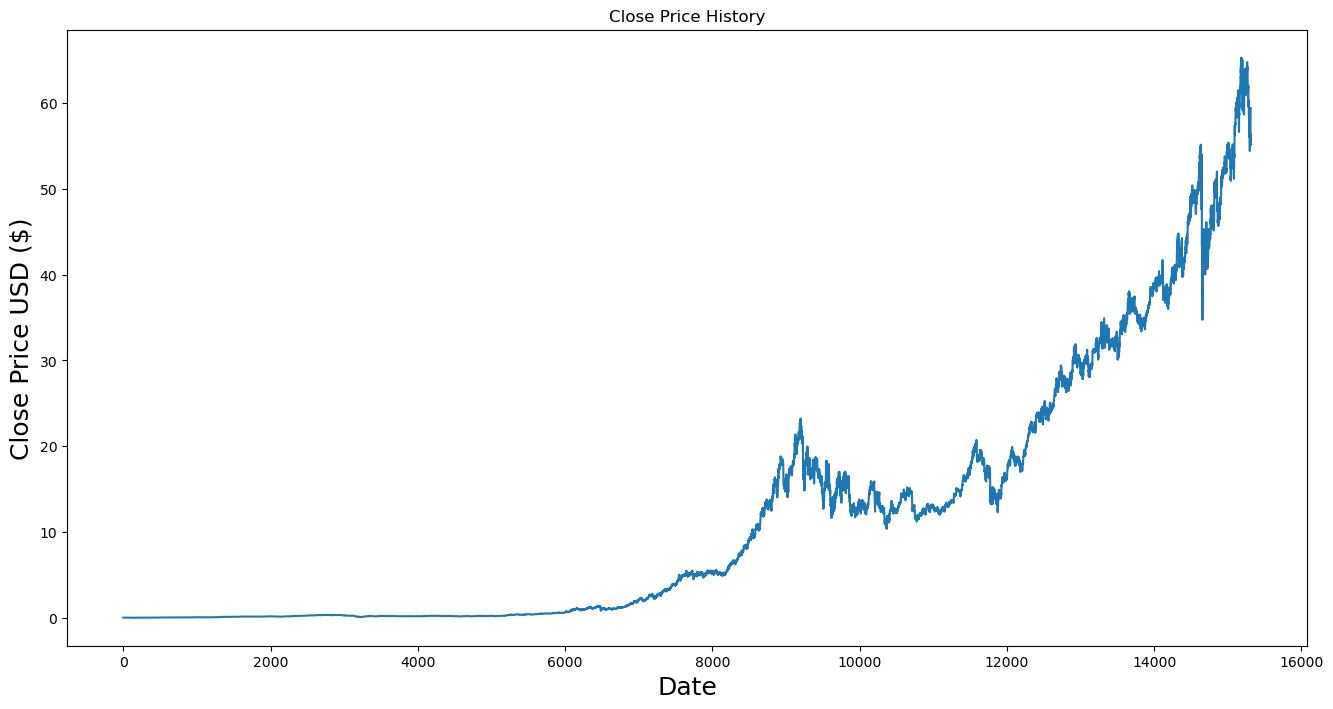

In [67]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [69]:
data = df.filter(['Close'])
dataset = data.values

In [71]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [73]:
train_size = int(len(dataset) * 0.8)
train_data = scaled_data[0:train_size, :]
test_data = scaled_data[train_size - 60:, :]

def create_dataset(data, look_back=60):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 5
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

In [75]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [77]:
lstm_model = Sequential()
lstm_model.add(Input(shape=(look_back, 1)))  
lstm_model.add(LSTM(50, return_sequences=True))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

In [79]:
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, batch_size=1, epochs=1)

12243/12243 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 2.2719e-04


In [81]:
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

rmse = np.sqrt(np.mean(((lstm_predictions - y_test) ** 2)))
print('LSTM Model RMSE:', rmse)
     

98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
LSTM Model RMSE: 38.591034271250415


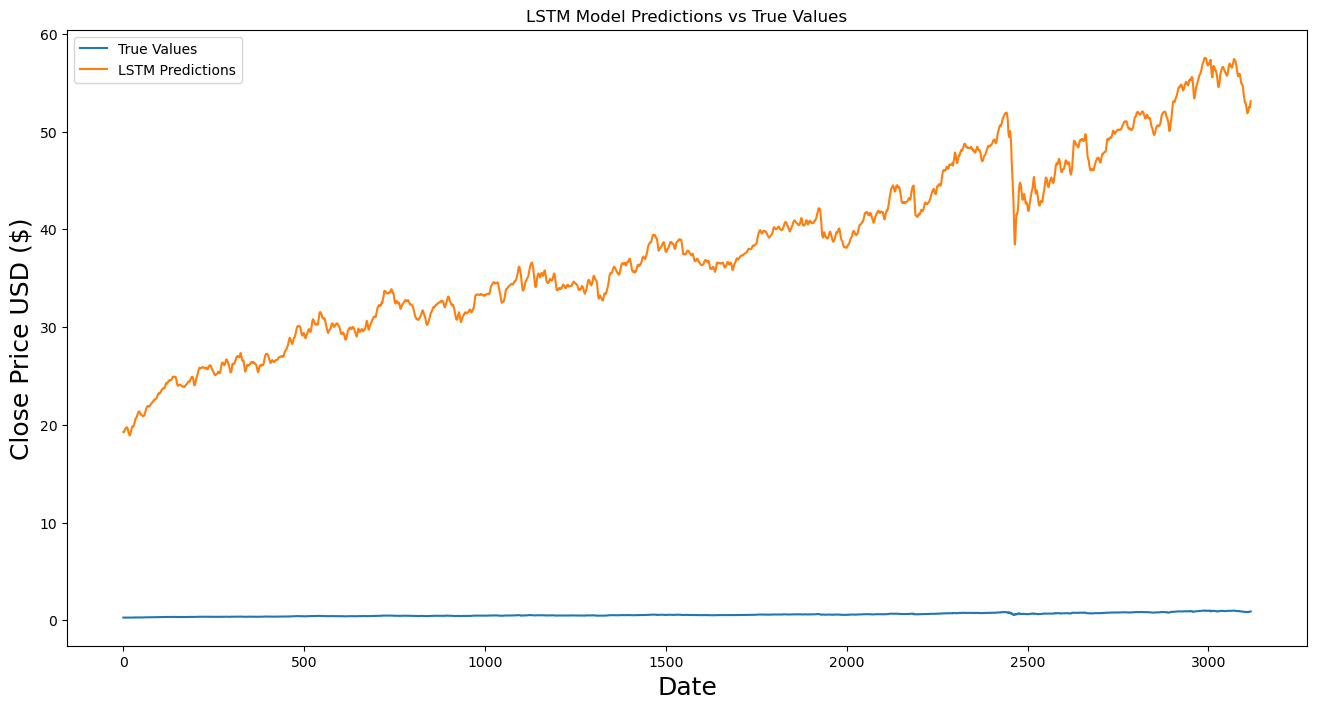

In [83]:
plt.figure(figsize=(16,8))
plt.title('LSTM Model Predictions vs True Values')
plt.plot(y_test, label='True Values')
plt.plot(lstm_predictions, label='LSTM Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()

In [85]:
X = data.index.values.reshape(-1, 1)
y = data['Close'].values

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
     

In [95]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
     

In [97]:
svr_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_model.fit(X_train_scaled, y_train)

SVR(C=1000.0, gamma=0.1)

In [99]:
svr_predictions = svr_model.predict(X_test_scaled)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_predictions))
print('SVR Model RMSE:', svr_rmse)

SVR Model RMSE: 31.388272265004012


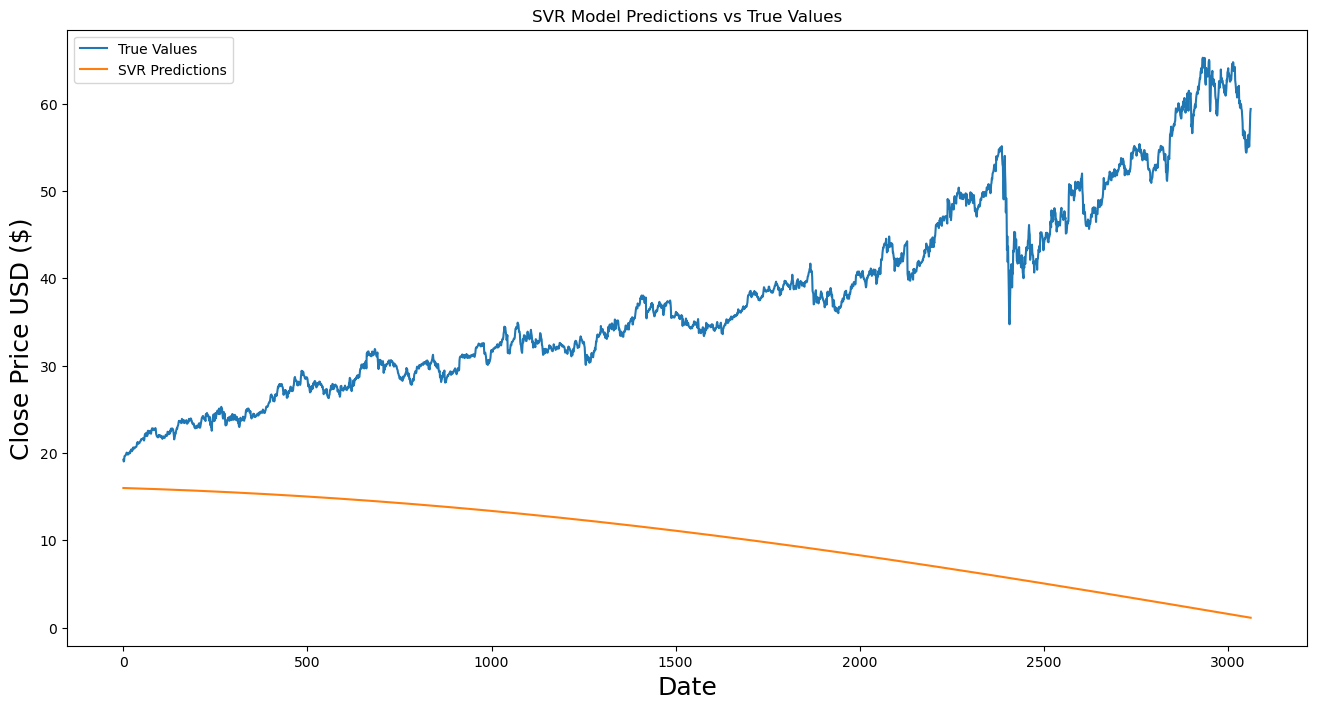

In [101]:
plt.figure(figsize=(16,8))
plt.title('SVR Model Predictions vs True Values')
plt.plot(y_test, label='True Values')
plt.plot(svr_predictions, label='SVR Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()

In [103]:
X = data.index.values.reshape(-1, 1)
y = data['Close'].values

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [119]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [122]:
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_model.fit(X_train_scaled, y_train)

SGDRegressor()

In [124]:
sgd_predictions = sgd_model.predict(X_test_scaled)
sgd_rmse = np.sqrt(mean_squared_error(y_test, sgd_predictions))
print('SGD Model RMSE:', sgd_rmse)

SGD Model RMSE: 21.811865954813065


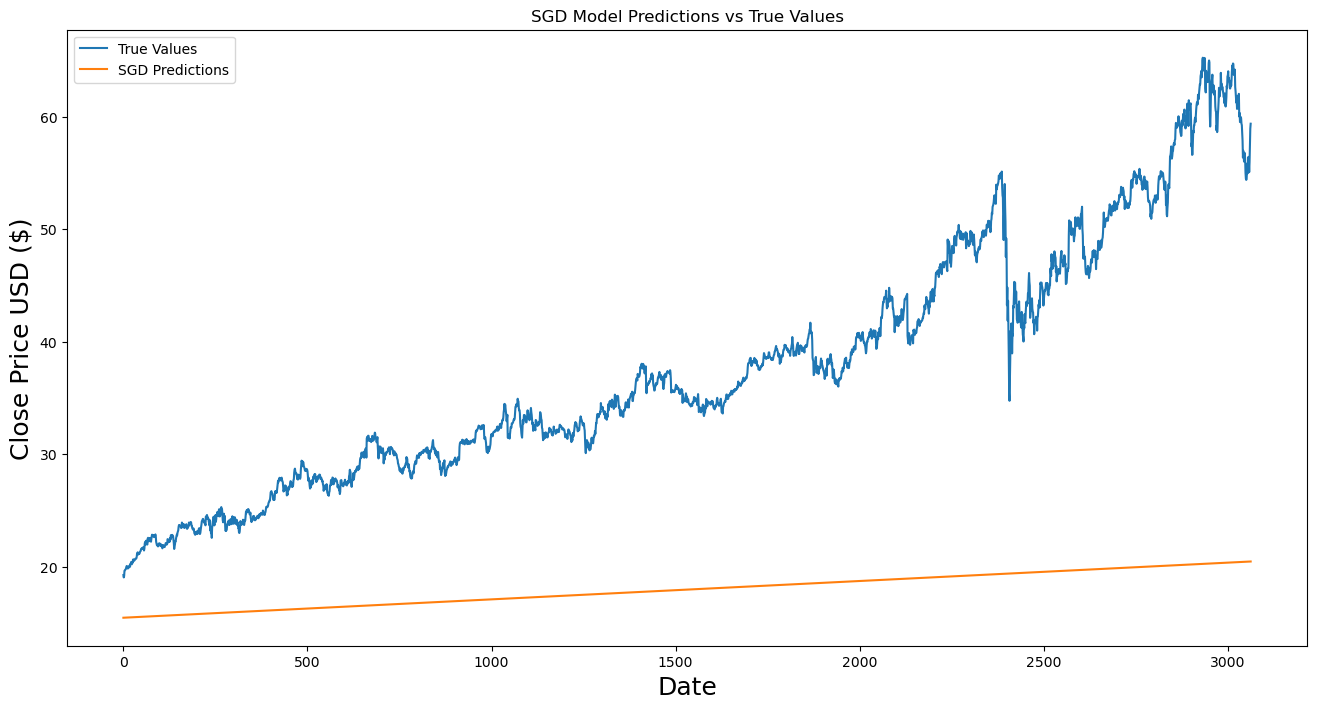

In [126]:
plt.figure(figsize=(16,8))
plt.title('SGD Model Predictions vs True Values')
plt.plot(y_test, label='True Values')
plt.plot(sgd_predictions, label='SGD Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()

In [128]:
X = data.index.values.reshape(-1, 1)
y = data['Close'].values
     

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Training the Decision Tree Regressor Model
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [132]:
dtr_predictions = dtr_model.predict(X_test)
dtr_rmse = np.sqrt(mean_squared_error(y_test, dtr_predictions))
print('Decision Tree Model RMSE:', dtr_rmse)

Decision Tree Model RMSE: 21.608274306195128


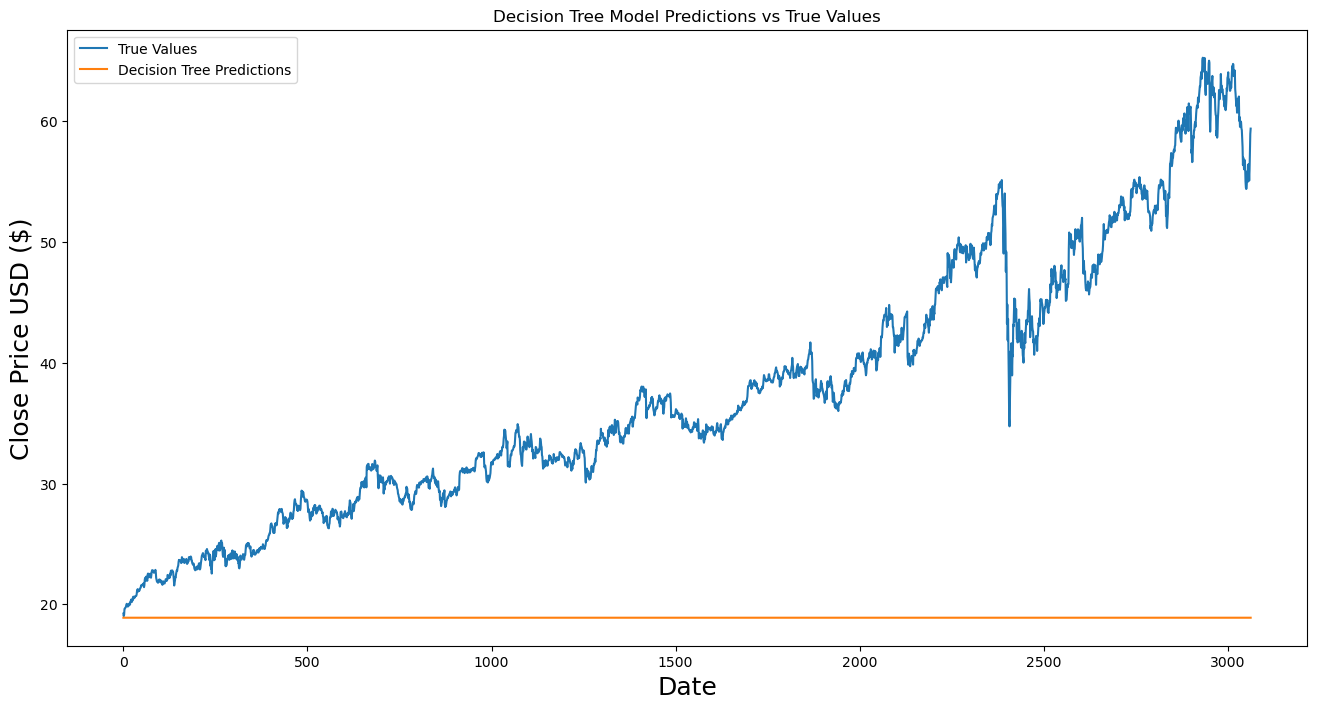

In [134]:
plt.figure(figsize=(16,8))
plt.title('Decision Tree Model Predictions vs True Values')
plt.plot(y_test, label='True Values')
plt.plot(dtr_predictions, label='Decision Tree Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()

In [136]:
X = data.index.values.reshape(-1, 1)
y = data['Close'].values

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Training the Random Forest Regressor Model
rfr_model = RandomForestRegressor(n_estimators=100)
rfr_model.fit(X_train, y_train)

RandomForestRegressor()

In [140]:
rfr_predictions = rfr_model.predict(X_test)
rfr_rmse = np.sqrt(mean_squared_error(y_test, rfr_predictions))
print('Random Forest Model RMSE:', rfr_rmse)

Random Forest Model RMSE: 21.576662625807582


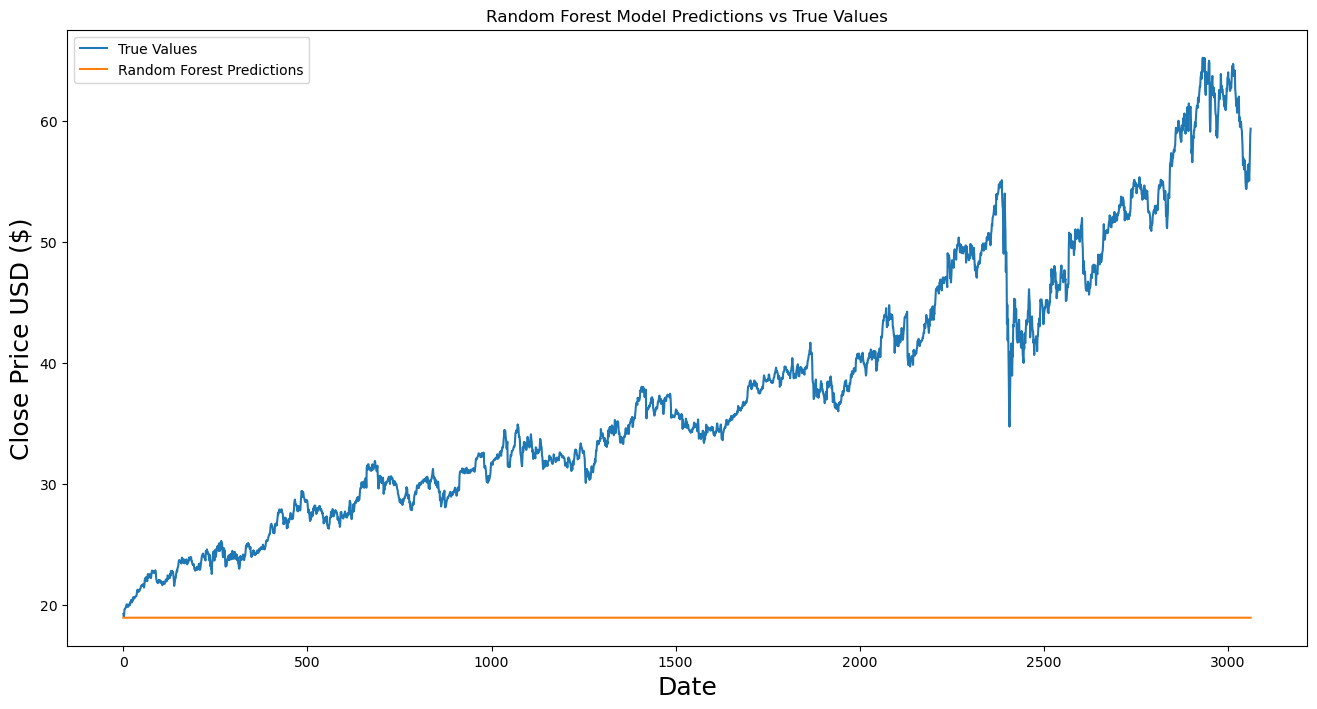

In [142]:
plt.figure(figsize=(16,8))
plt.title('Random Forest Model Predictions vs True Values')
plt.plot(y_test, label='True Values')
plt.plot(rfr_predictions, label='Random Forest Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()
     